In [1]:
import astropy.units as u
from astropy.coordinates import AltAz, EarthLocation, SkyCoord, get_sun
from astropy.time import Time
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
t1 = Time("2024-01-01")
# Let's do every 5 minutes for a year
dt = 5./60./24.
mjds = np.arange(t1.mjd, t1.mjd+365.25, dt)
times = Time(mjds, format="mjd")

In [3]:
location = EarthLocation.of_address("Seattle")

In [4]:
suns = get_sun(times)

In [5]:
aa_sun = suns.transform_to(AltAz(location=location))

In [6]:
# say the azimuth has to be within a degree of 90 to be aligned
az_ideal = 90.
az_pad = 1.

In [7]:
indx = np.where((aa_sun.az.deg > az_ideal-az_pad) & (aa_sun.az.deg < az_ideal+az_pad))

Text(0, 0.5, 'Sun Altitude (degrees)')

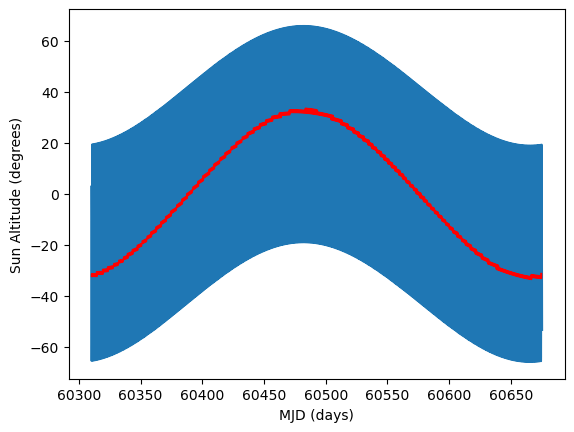

In [8]:
plt.plot(mjds, aa_sun.alt.deg)
plt.plot(mjds[indx], aa_sun.alt.deg[indx], 'r-')
plt.xlabel('MJD (days)')
plt.ylabel('Sun Altitude (degrees)')

In [9]:
alt_ideal = 5.
alt_pad = 1.

In [10]:
# 
indx = np.where((aa_sun.az.deg > az_ideal-az_pad) & (aa_sun.az.deg < az_ideal+az_pad) &
                (aa_sun.alt.deg > alt_ideal-alt_pad) & (aa_sun.alt.deg < alt_ideal+alt_pad))

In [11]:
# Find the days where the sun passes through the ideal alt and az. 
np.unique(np.round(mjds[indx]))

array([60397., 60398., 60399., 60400., 60401., 60563., 60564., 60565.,
       60566., 60567., 60568.])